# 1. Visualization

In this notebook I create the visualization to decided how to create the pipelines and the models.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data_path = './data/train.csv'
train_dataframe = pd.read_csv(train_data_path)
train_dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

/tmp/ipykernel_56411/473129610.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


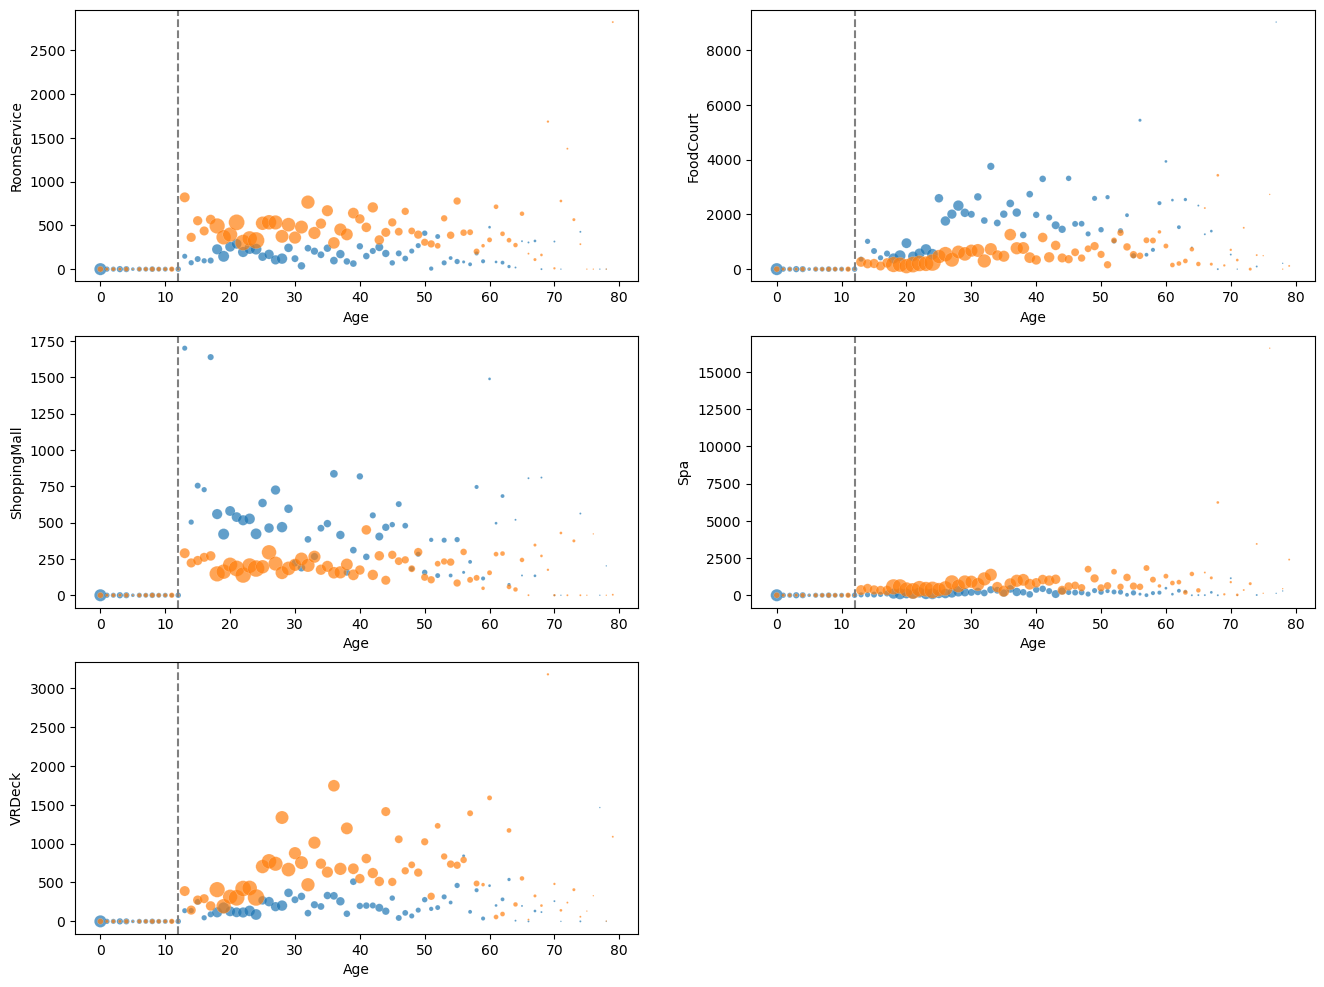

In [4]:
def plot_spendings_mean(ax, dataframe, expense):
    df = dataframe.copy()
    grouped_by_age = df.groupby('Age')[expense].aggregate(['mean', 'count'])
    sns.scatterplot(
        ax = ax,
        x = grouped_by_age.index,
        y = grouped_by_age['mean'].values,
        s = grouped_by_age['count'].values,
        alpha = 0.7 )
    ax.set_ylabel(expense)

dataframe = train_dataframe.copy()
df = dataframe

expenses_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df = df[df['CryoSleep'] == False]
df = df.loc[:, expenses_list + ['Age', 'Transported']]
df.dropna(axis = 0, inplace = True)

figure = plt.figure(figsize = (16, 12))
for index, expense in enumerate(expenses_list, start = 1):
    ax = figure.add_subplot(3, 2, index)
    plot_spendings_mean(ax, df[df['Transported'] == True], expense)
    plot_spendings_mean(ax, df[df['Transported'] == False], expense)
    plt.axvline(x = 12, color = 'grey', linestyle = '--')

figure.show()